In [5]:
!pip install pandas numpy scipy matplotlib sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 2.3 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01


### **Задание 1**

Вычислите значение вектора $C$ по формуле $$ C = \dfrac{A - 3BA}{\pi}, $$
где $A–$ вектор-столбец из случайных равномерно распределенных чисел на отрезка $[-10; 10]$ размера восемь на один, а $B–$ квадратная матрица размера восемь на восемь состоящая из равномерно распределенных целых чисел на отрезке $[-2; 2].$

Найдите сумму всех координат вектора $C$ с точностью до двух знаков после запятой (используя стандартное округление), при условии, что __все векторы были сгенерированы с фиксированным состоянием генератора случайных чисел равному 12__.


In [1]:
# Решение
import numpy as np
np.random.seed(12)

A = np.random.random((8, 1))
B = np.random.randint(0, 10, size=(8, 8))

C = (A - 3 * B.dot(A)) / np.pi

round(np.sum(C), 2)

-121.35

### **Задание 2**

На основе датасета из практического занятия создайте новый датасет, состоящий из столбцов: `Country`, `Population`, `Urban_population`, в котором есть данные только тех стран, чье население более 100 тысяч человек, но не превосходит одного миллиона.

Создайте в новом датасете столбец `Urban_percent`, который нужно рассчитать на основе имеющихся данных. Отсортируйте строки в порядке уменьшения значения в столбце `Urban_percent` и отобразите первые три строчки отсортированного датасета.

__Обращайте внимание на типы данных, которые содержатся в датасете. Иногда возникает необходимость преобразовывать один тип данных в другой. Для смены типа данных во всем стобце или строке датасета удобно использовать метод *map*__. [Подробнее о методе](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html).

In [3]:
# Решение
import pandas as pd
df = pd.read_csv('world-data-2023.csv')[['Country', 'Population', 'Urban_population']]

df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Urban_population'] = df['Urban_population'].str.replace(',', '').astype(float)

df2 = df[(df['Population'] > 100000) & (df['Population'] < 1000000)][['Country', 'Population', 'Urban_population']]
df2['Urban_percent'] = (df2['Urban_population'] / df2['Population']) * 100

df2.dropna(inplace=True)

df2_sorted = df2.sort_values(by='Urban_percent', ascending=False)
df2_sorted.head(3)




,Country,Population,Urban_population,Urban_percent
106,Malta,502653.0,475902.0,94.678038
76,Iceland,361313.0,339110.0,93.854912
100,Luxembourg,645397.0,565488.0,87.618629


### **Задание 3**

Дана функция $$f(x, y, z) = (\sin(2x - z) + 2xzy^2)^{2}.$$

Найти значение выражения $$\dfrac{\partial}{\partial x}\left( \dfrac{\partial f(x, y, z)}{\partial z}  \right),$$
при $x = 0, y = 5, z = \pi/2.$

__Замечание:__ Нужно использовать функционал библиотеки _sympy_, понадобятся метод [*subs*](https://docs.sympy.org/latest/modules/core.html#sympy.core.basic.Basic.subs) и функция [diff](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html#).

In [7]:
import sympy as sp

# Определение символьных переменных
x, y, z = sp.symbols('x y z')

# Определение функции f(x, y, z)
f = (sp.sin(2*x - z) + 2*x*z*(y**2))**2

# Вычисление частной производной ∂f/∂z
df_dz = sp.diff(f, z)

# Подстановка значений x=0, y=5, z=π/2
x_val = 0
y_val = 5
z_val = sp.pi / 2

df_dz_val = df_dz.subs({x: x_val, y: y_val, z: z_val})

# Вывод значения частной производной ∂f/∂z
df_dz_val



0

### **Задание 4**

Создайте `numpy-массив` состоящий из $1000$ случайных чисел, сгенерированных на основе нормального распределения со значением дисперсии равным двум и математическим ожиданием равным $10.$ **При генерации используйте _random.seed(10)_**.

Округлите все значения до целых чисел, используя стандартное округление (`round`).

Постройте гистограмму, основанную на частоте встречаемых целых значений в преобразованном _numpy-массиве_, для этого пригодится функция [bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).



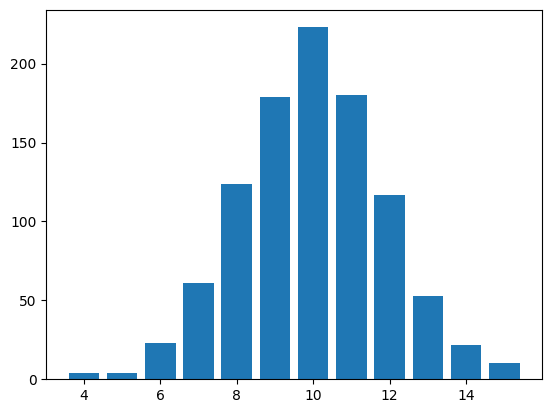

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

arr = [round(i) for i in np.random.normal(10, 2, 1000)]

values, counts = np.unique(arr, return_counts=True)
plt.bar(values, counts)
plt.show()